# Benchmark Figures on Selected Tasks

## Setup

In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Define color palette
sns.set_theme(
    color_codes=True, palette="bright", style="ticks", context="talk", font_scale=1.5
)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    inputs = open(filename, "r")
    lines = inputs.readlines()
    ls = []
    for line in lines:
        ls.append(ast.literal_eval(line))
    return ls


def plot_acc(col, ls, pos, n_train, lw=5):
    if pos == 0:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, label=legends[i], lw=lw, color=colors[i], linestyle=styles[i]), 
    else:
        for i, l in enumerate(ls[pos]):
            col.plot(n_train, l, lw=lw, color=colors[i], linestyle=styles[i])

In [4]:
directory = "../benchmarks/results/"
prefixes = ["sdt/", "sdf/", "dt/", "rf/", "ht/", "mf/"]
legends = ["SDT", "SDF", "DT", "RF", "HT", "MF"]
colors = ["r", "r", "b", "b", "g", "y"]
styles = ["--", "-", "--", "-", "-", "-"]
datasets = ["splice", "pendigits", "cifar10"]
ranges = [23, 74, 500]

## Accuracy Plot

In [5]:
acc_ls = []
for i, dataset in enumerate(datasets):
    acc_l = []

    for prefix in prefixes:
        acc = np.mean(
            load_result(directory + prefix + dataset + "_acc.txt")[:10], axis=0
        )
        acc_l.append(acc)

    acc_ls.append(acc_l)

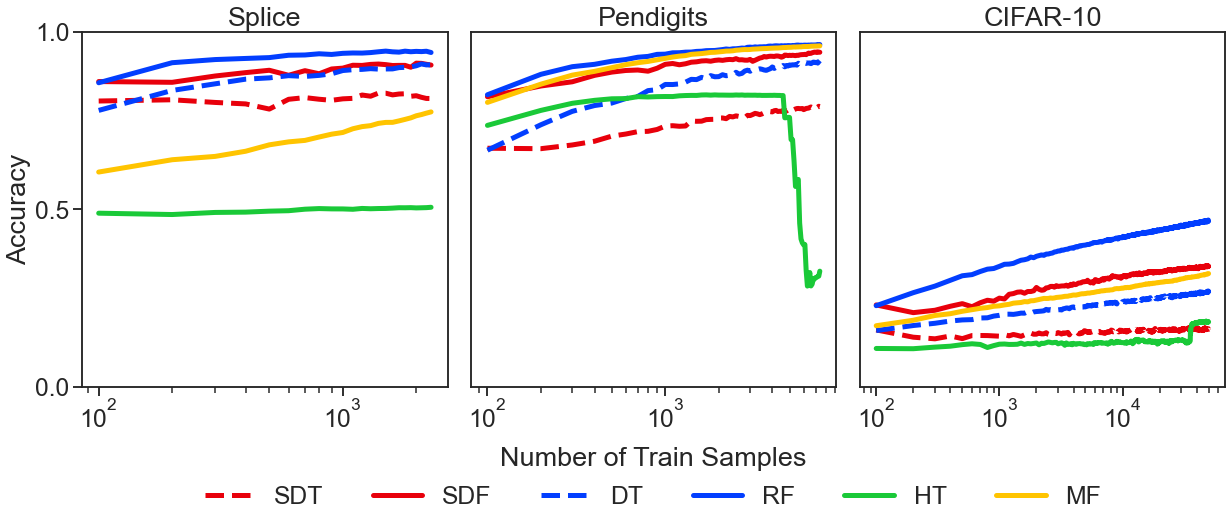

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6), constrained_layout=True)

fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
xtitles = ["Splice", "Pendigits", "CIFAR-10"]
ytitles = ["Accuracy", "Virtual Memory (GB)"]
ylimits = [[0, 1], [0, 56]]
yticks = [[0, 0.5, 1], [0, 56]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    col.set_title(xtitles[i])
    plot_acc(col, acc_ls, i, n_train)

    # Label y axis
    if i % 3 == 0:
        col.set_yticks(yticks[0])
        col.set_ylabel(ytitles[i])
    else:
        col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_acc.pdf", transparent=True, bbox_inches="tight")

## Time Plot

In [7]:
# Show concatenated mem for batch estimators
concat = True

time_ls = []
for i, dataset in enumerate(datasets):
    time_l = []

    for prefix in prefixes:
        time = np.mean(
            load_result(directory + prefix + dataset + "_train_t.txt")[:10], axis=0
        )

        if concat and (prefix == "dt/" or prefix == "rf/"):
            for j in range(1, ranges[i]):
                time[j] += time[j - 1]

        time_l.append(time)

    time_ls.append(time_l)

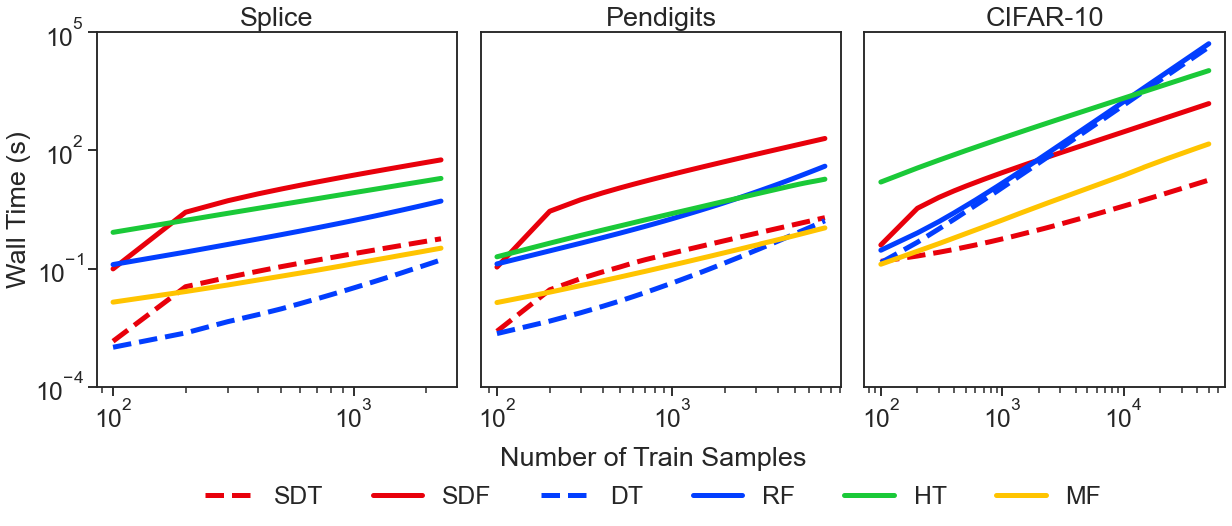

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6), constrained_layout=True)

fig.text(0.53, -0.07, "Number of Train Samples", ha="center")
xtitles = ["Splice", "Pendigits", "CIFAR-10"]
ytitles = ["Wall Time (s)"]
ylimits = [[1e-4, 1e5]]
yticks = [[1e-4, 1e-1, 1e2, 1e5]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_yscale("log")
    col.set_ylim(ylimits[0])

    n_train = range(100, (ranges[i] + 1) * 100, 100)

    # Label x axis and plot figures
    col.set_title(xtitles[i])
    plot_acc(col, time_ls, i, n_train)

    # Label y axis
    if i % 3 == 0:
        col.set_yticks(yticks[0])
        col.set_ylabel(ytitles[i])
    else:
        col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.22),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_time.pdf", transparent=True, bbox_inches="tight")

## Accuracy & Time Plot

In [9]:
# Show concatenated mem for batch estimators
concat = True

acc_ls = []
time_ls = []
for i, dataset in enumerate(datasets):
    acc_l = []
    time_l = []

    for prefix in prefixes:
        acc = np.mean(
            load_result(directory + prefix + dataset + "_acc.txt")[:10], axis=0
        )
        acc_l.append(acc)

        time = np.mean(
            load_result(directory + prefix + dataset + "_train_t.txt")[:10], axis=0
        )

        if concat and (prefix == "dt/" or prefix == "rf/"):
            for j in range(1, ranges[i]):
                time[j] += time[j - 1]

        time_l.append(time)

    acc_ls.append(acc_l)
    time_ls.append(time_l)

ls = acc_ls + time_ls

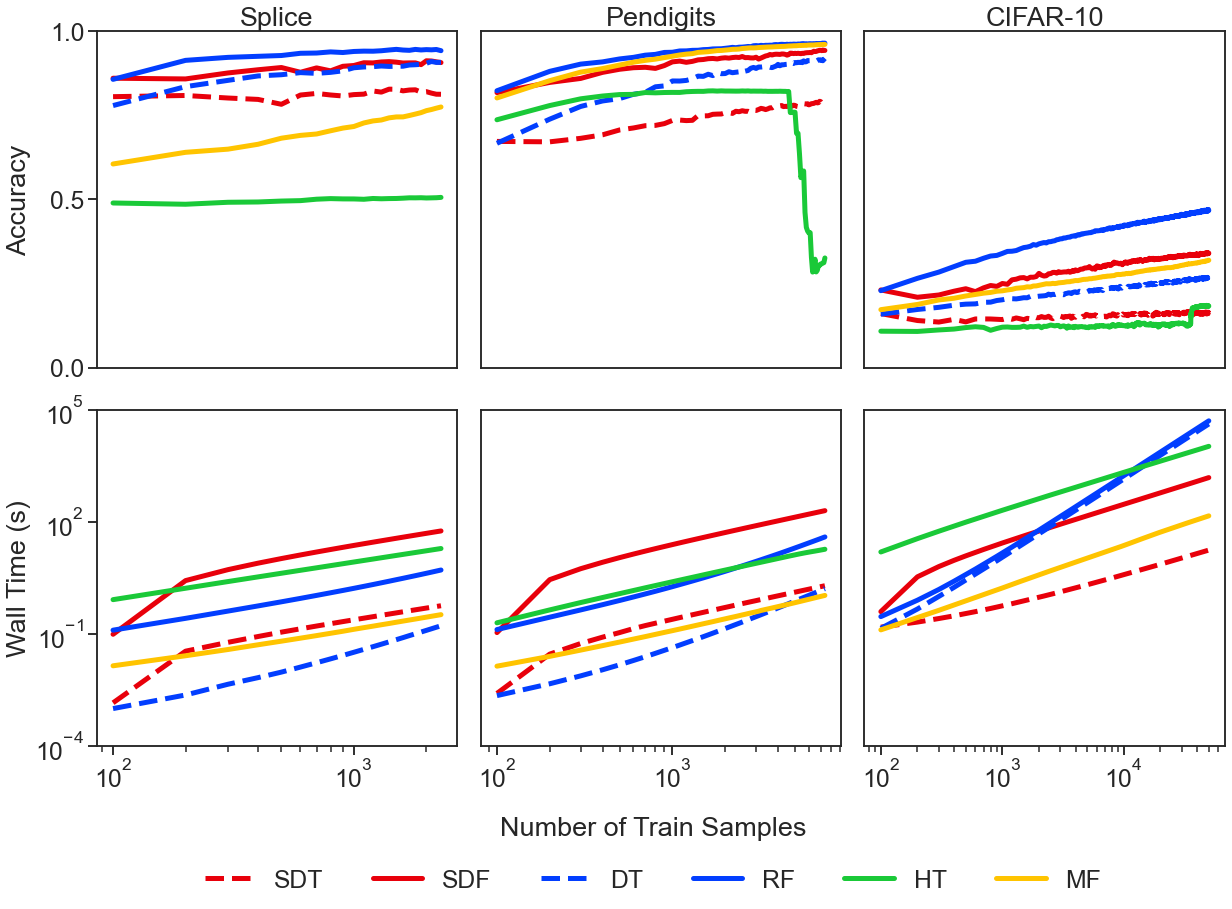

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(17, 11), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
xtitles = ["Splice", "Pendigits", "CIFAR-10"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-4, 1e5]]
yticks = [[0, 0.5, 1], [1e-4, 1e-1, 1e2, 1e5]]

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        count = 3 * i + j
        col.set_xscale("log")
        col.set_ylim(ylimits[i])

        n_train = range(100, (ranges[j] + 1) * 100, 100)

        # Label x axis and plot figures
        if count < 3:
            col.tick_params(
                axis="x", which="both", bottom=False, top=False, labelbottom=False
            )
            col.set_title(xtitles[j])
            plot_acc(col, ls, j, n_train)
        else:
            if count == 5:
                col.set_xticks([1e2, 1e3, 1e4, 1e5])
            else:
                col.set_xticks([1e2, 1e3, 1e4])
            col.set_yscale("log")
            plot_acc(col, ls, j + 3, n_train)

        # Label y axis
        if count % 3 == 0:
            col.set_yticks(yticks[i])
            col.set_ylabel(ytitles[i])
        else:
            col.set_yticks([])

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.15),
    bbox_transform=plt.gcf().transFigure,
    ncol=6,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/select_acc_time.pdf", transparent=True, bbox_inches="tight")

## Memory Plot

In [11]:
# Reorder plots
prefixes = ["sdf/", "sdt/", "dt/", "rf/", "ht/", "mf/"]
legends = ["SDF", "SDT", "DT", "RF", "HT", "MF"]
styles = ["-", "--", "--", "-", "-", "-"]

# Load CIFAR-10 memory records
cifar_mem_l = []
for prefix in prefixes:
    cifar_mem = (
        np.mean(load_result(directory + prefix + dataset + "_v_m.txt")[:1], axis=0)
        * 56
        / 100
    )
    cifar_mem_l.append(cifar_mem)

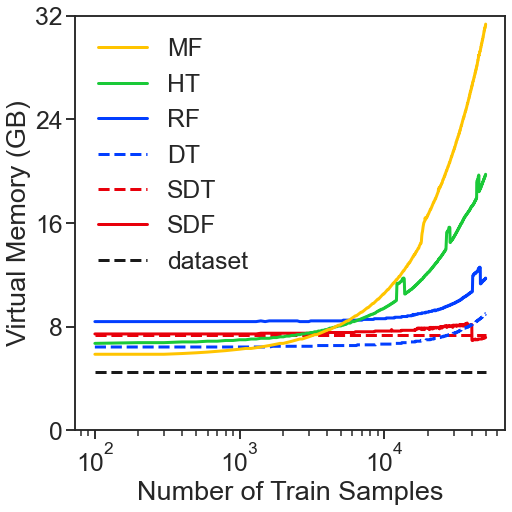

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), constrained_layout=True)

xtitle = "Number of Train Samples"
ytitle = "Virtual Memory (GB)"
ylimit = [0, 32]
ytick = [0, 8, 16, 24, 32]

ax.set_xscale("log")
ax.set_ylim(ylimit)

n_train = range(100, (ranges[2] + 1) * 100, 100)

# Plot dataset size
cifar_data_mem = 8.0 * 56 / 100 * np.ones(len(n_train))
ax.plot(n_train, cifar_data_mem, label="dataset", color="k", linestyle="dashed", lw=3)

# Label x axis and plot figures
plot_acc(ax, [cifar_mem_l], 0, n_train, lw=3)
ax.set_xlabel(xtitle)

# Label y axis
ax.set_yticks(ytick)
ax.set_ylabel(ytitle)

# Legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], frameon=False)

plt.savefig("../paper/select_cifar_mem.pdf", transparent=True, bbox_inches="tight")